In [265]:
from matplotlib import pyplot as plt
from pandas import read_excel
import pandas as pd
import datetime
import seaborn as sb
df = read_excel('https://data.hossam.kr/D01/covid19.xlsx')
df

,서울시 기준일,서울 확진자,서울시 일일 확진,서울시 사망,전국 확진,전국 일일 확진,전국 사망
0,2023-05-31,6204277,5987.0,6492,31703511.0,24411.0,34784
1,2023-05-30,6198290,3326.0,6486,31679100.0,13529.0,34767
2,2023-05-29,6194964,1393.0,6485,31665571.0,6868.0,34760
3,2023-05-28,6194964,1393.0,6485,31665571.0,6868.0,34760
4,2023-05-27,6191196,4078.0,6485,31647238.0,17796.0,34784
...,...,...,...,...,...,...,...
1207,2020-02-09,10,0.0,0,27.0,0.0,0
1208,2020-02-08,10,0.0,0,24.0,0.0,0
1209,2020-02-07,10,0.0,0,24.0,0.0,0
1210,2020-02-06,11,0.0,0,24.0,0.0,0


#### 그래프 요구사항
___
-   사용자로부터 날짜를 yyyymmdd의 8자리 문자열로 입력받은 후 그 날짜를 시작으로 1주일간의 데이터를 추출하시오.
-   2행 1열의 서브플롯을 만들고 각각의 그래프 영역에 대한 twinx를 생성하시오.
-   첫 번째 영역에는 서울시의 누적 확진자와 일일 확진자 변동 추이를 확인할 수 있는 시각화 자료를 생성하시오.
-   두 번째 영역에는 전국에 대한 누적 확진자와 일일 확진자 변동 추이를 확인할 수 있는 시각화 자료를 생성하시오.
-   누적 확진자는 y축을 왼쪽으로 설정한 막대그래프로 표시하고 일일 확진자는 y축을 오른쪽으로 설정한 시계열 그래프로 생성해야 합니다.
-   seaborn을 활용하여 구현하세요

In [266]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

In [267]:
date = input('조회를 원하는 날짜를 입력하시오(format:yyyymmdd):')
start_date = datetime.datetime.strptime(date, '%Y%m%d')
end_date = start_date + datetime.timedelta(days=6)

In [283]:
query_df = df.query("`서울시 기준일` >= @ start_date and `서울시 기준일` <= @end_date")
target_df = query_df.sort_values('서울시 기준일')
target_df.reset_index(inplace=True, drop=True)
target_df

,서울시 기준일,서울 확진자,서울시 일일 확진,서울시 사망,전국 확진,전국 일일 확진,전국 사망
0,2022-03-18,1894113,81997.0,2968,8657609.0,407017.0,11782
1,2022-03-19,2038438,82132.0,3015,9038938.0,381454.0,12101
2,2022-03-20,2042110,65870.0,3059,9373646.0,334708.0,12428
3,2022-03-21,2083188,41078.0,3098,9582815.0,209169.0,12757
4,2022-03-22,2148186,65033.0,3144,9936540.0,353980.0,13141
5,2022-03-23,2249310,101133.0,3187,10427247.0,490881.0,13432
6,2022-03-24,2327080,77770.0,3248,10822836.0,395598.0,13902


In [279]:
x = list(range(0, len(target_df['서울시 기준일'])))
xticks = []
print(type(target_df['서울시 기준일'][0]))
for i in range(0,len(target_df['서울시 기준일'])):
    xticks.append(target_df['서울시 기준일'][i].strftime('%m.%d')) # 해결방법

print(xticks)

['03.18', '03.19', '03.20', '03.21', '03.22', '03.23', '03.24']


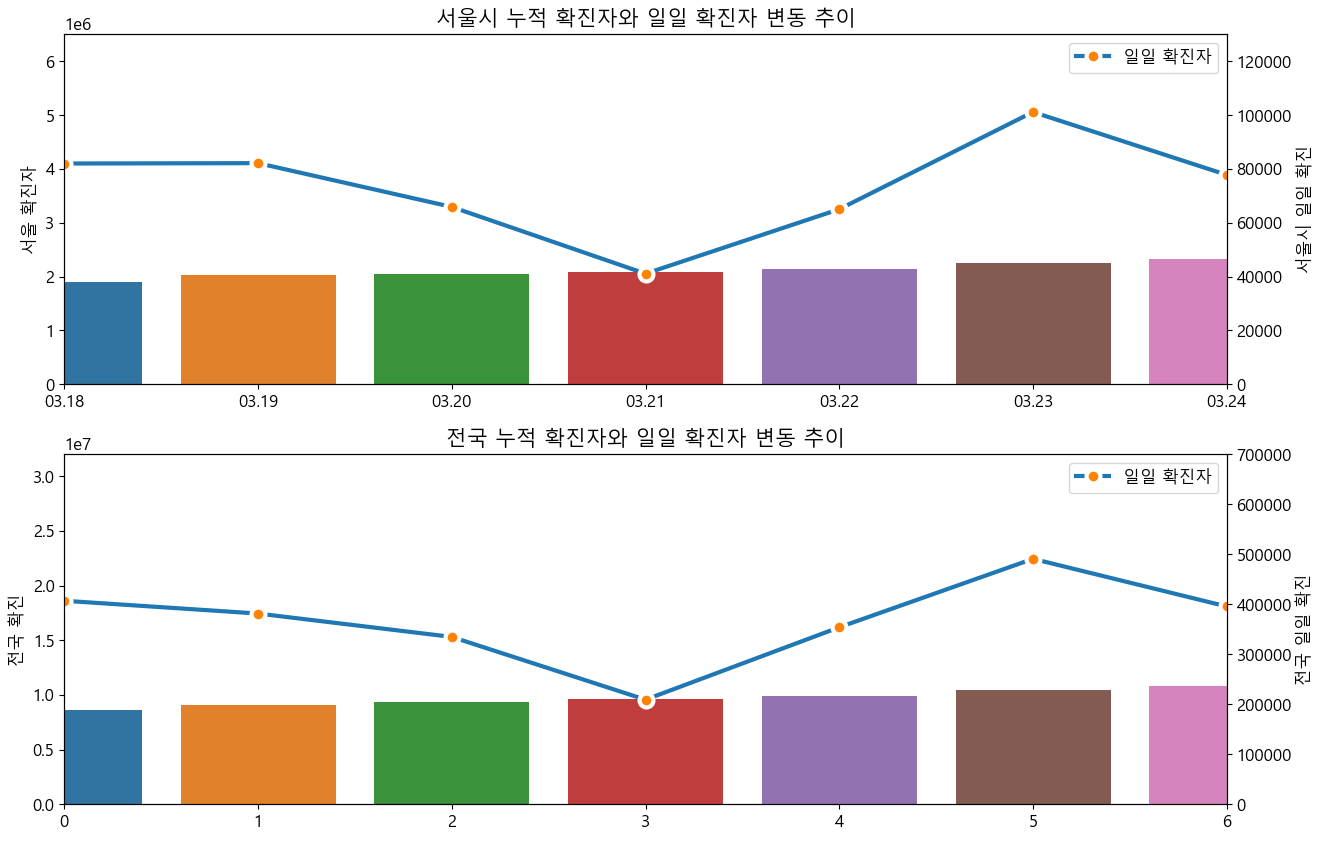

In [270]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15,10))
ax3 = ax1.twinx()

sb.barplot(data = target_df, x= x, y='서울 확진자' ,ax = ax1, label = '누적 확진자')
sb.lineplot(data= target_df, x= x, y = '서울시 일일 확진' ,ax= ax3,  linestyle='-', linewidth=3,
            marker="o", markersize=10, markerfacecolor="#FF8200",
            markeredgecolor="#ffffff", markeredgewidth=3,label = '일일 확진자')

start = min(x)
end= max(x)
ax1.set_xlim([start, end])
ax1.set_ylim(0, 6500000)
ax3.set_ylim(0,130000)
ax1.title.set_text('서울시 누적 확진자와 일일 확진자 변동 추이')
ax1.title.set_fontsize(15)
ax1.title.set_color('black')
ax1.set_xticks(x)
ax1.set_xticklabels(xticks, fontsize=12, rotation=0)


ax4 = ax2.twinx()
sb.barplot(data = target_df, x= x, y='전국 확진' ,ax = ax2, label = '누적 확진자')
sb.lineplot(data= target_df, x= x, y = '전국 일일 확진' ,ax= ax4, linestyle='-', linewidth=3,
            marker="o", markersize=10, markerfacecolor="#FF8200",
            markeredgecolor="#ffffff", markeredgewidth=3, label = '일일 확진자')
start = min(x)
end= max(x)
ax2.set_xlim([start, end])
ax2.set_ylim(0, 32000000)
ax4.set_ylim(0,700000)
ax2.title.set_text('전국 누적 확진자와 일일 확진자 변동 추이')
ax2.title.set_fontsize(15)
ax2.title.set_color('black')
ax1.set_xticks(x)
ax1.set_xticklabels(xticks, fontsize=12, rotation=0)

plt.legend()
plt.show()
plt.close()

datetime 사용법

In [271]:
today = datetime.datetime.now()
today

datetime.datetime(2023, 7, 5, 10, 45, 56, 790355)

In [272]:
today.strftime('%Y년 %m월 %d일 %H시 %M분 %S초')


'2023년 07월 05일 10시 45분 56초'

날짜계산 방법  

In [273]:
s = '20230514'
daysafters = s+datetime.timedelta(days=18)

TypeError: can only concatenate str (not "datetime.timedelta") to str